# Page rank algorithm

This algorithm was first used to rank web pages in the Google search engine. 

PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. The underlying assumption is that more important websites are likely to receive more links from other websites.

It is not the only algorithm used by Google to order search engine results, but it is the first algorithm that was used by the company, and it is the best-known. The above centrality measure is not implemented for multi-graphs.

![pagerank1](pr1.png)
#### Algorithm

The PageRank algorithm outputs a probability distribution used to represent the likelihood that a person randomly clicking on links will arrive at any particular page. PageRank can be calculated for collections of documents of any size. It is assumed in several research papers that the distribution is evenly divided among all documents in the collection at the beginning of the computational process. The PageRank computations require several passes, called “iterations”, through the collection to adjust approximate PageRank values to more closely reflect the theoretical true value.




In [11]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd


In [5]:
graph=nx.gnp_random_graph(10,0.6,directed=True)

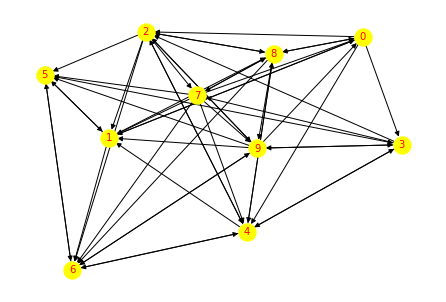

In [6]:
nx.draw(graph,with_labels=True,font_color='red',font_size=10,node_color='yellow')

In [9]:
count=graph.number_of_nodes()
count,graph.neighbors(1)

(10, <dict_keyiterator at 0x7f1f6ad1c220>)

In [22]:
rank_dict={}
x=rd.randint(0,10)
for j in range(0,10):
    rank_dict[j]=0
rank_dict[x]=rank_dict[x]+1


In [23]:
for i in range(600):
    list_n=list(graph.neighbors(x))
    if(len(list_n)==0):
        x=rd.randint(0,10)
        rank_dict[x]=rank_dict[x]+1
    else:
        x=rd.choice(list_n)
        rank_dict[x]=rank_dict[x]+1


In [24]:
for j in range(0,10):
    rank_dict[j]=rank_dict[j]/600


In [25]:
pagerank=nx.pagerank(graph)

In [26]:
pagerank_sorted=sorted(pagerank.items(),key=lambda v:(v[1],v[0]),reverse=True)
pagerank_sorted

[(6, 0.1374074889579734),
 (4, 0.11820729191202153),
 (1, 0.11312937554941795),
 (5, 0.11175357704395411),
 (9, 0.10561871474883738),
 (2, 0.09551432128955704),
 (3, 0.09431031599156957),
 (8, 0.09054276002791627),
 (0, 0.07405033629249189),
 (7, 0.059465818186260656)]

In [27]:
rank_dict_sorted=sorted(rank_dict.items(),key=lambda v:(v[1],v[0]),reverse=True)
rank_dict_sorted

[(6, 0.14333333333333334),
 (1, 0.12666666666666668),
 (5, 0.12),
 (4, 0.11),
 (9, 0.10833333333333334),
 (3, 0.09166666666666666),
 (2, 0.08666666666666667),
 (0, 0.08166666666666667),
 (8, 0.08),
 (7, 0.05333333333333334)]

In [28]:
for i in rank_dict_sorted:
    print(i[0],end=" ")
print("\n\nThe order generated by networkx library is\n")

for i in pagerank_sorted:
    print(i[0],end=" ")


6 1 5 4 9 3 2 0 8 7 

The order generated by networkx library is

6 4 1 5 9 2 3 8 0 7 